<a href="https://colab.research.google.com/github/EveVengerov/Motion_Planning/blob/main/MotionPlanning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# Interactive 2R Planar Robot

import ipywidgets as widgets
from IPython.display import display
import math
import numpy as np
import matplotlib.pyplot as plt

# 2R planar robot parameters (lengths of two links)
L1 = 80
L2 = 60

# Function for inverse kinematics
def inverse_kinematics(x, y):
    dist = math.sqrt(x**2 + y**2)
    if dist > L1 + L2 :
        return  math.degrees(math.atan2(y, x)), 0 # Position out of reach
    elif dist < abs(L1 - L2):
        return math.degrees(math.atan2(y, x)), 180

    theta2 = math.acos((x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2))
    theta1 = math.atan2(y, x) - math.atan2((L2 * math.sin(theta2)), (L1 + L2 * math.cos(theta2)))
    return math.degrees(theta1), math.degrees(theta2)

def forward_kinematics(theta1, theta2):
  x = L1 * math.cos(math.radians(theta1)) + L2 * math.cos(math.radians(theta1 + theta2))
  y = L1 * math.sin(math.radians(theta1)) + L2 * math.sin(math.radians(theta1 + theta2))
  return x, y


# Function to update the robot's position and plot the trajectory
def update_robot_position(x, y):
    plt.clf()

    joint_angles = inverse_kinematics(x, y)

    if joint_angles is not None:
        # Smooth trajectory planning
        current_theta1, current_theta2 = 0, 180
        target_theta1, target_theta2 = joint_angles
        num_points = 30
        theta1_points = np.linspace(current_theta1, target_theta1, num_points)
        theta2_points = np.linspace(current_theta2, target_theta2, num_points)

        joint_trajectory = np.zeros((num_points,2))
        for i in range(num_points):
            # joint_angles = inverse_kinematics(x_points[i], y_points[i])
            joint_trajectory[i,:] = theta1_points[i], theta2_points[i]

        for i in range(0,num_points-1):
          # Simulate robot's motion using matplotlib
          theta1, theta2 = joint_trajectory[i,:]
          plt.title("2R Planar Robot Motion")
          plt.axis("equal")
          plt.xlim(-L1 - L2, L1 + L2)
          plt.ylim(-L1 - L2, L1 + L2)

          # Draw the robot links
          x0, y0 = 0, 0
          x1 = L1 * math.cos(math.radians(theta1))
          y1 = L1 * math.sin(math.radians(theta1))
          x2 = x1 + L2 * math.cos(math.radians(theta1 + theta2))
          y2 = y1 + L2 * math.sin(math.radians(theta1 + theta2))

          plt.plot([x0, x1, x2], [y0, y1, y2], 'go-')

        theta1, theta2 = joint_trajectory[num_points-1,:]
        plt.plot([x0, x1, x2], [y0, y1, y2], 'bo-')

        # Show the end-effector position as a red dot
        x,y = forward_kinematics(theta1, theta2)
        plt.plot(x, y, 'ro')

        plt.show()

# Create widgets for user input
x_widget = widgets.FloatSlider(min=-L1 - L2, max=L1 + L2, step=1, value=0, description="X:")
y_widget = widgets.FloatSlider(min=-L1 - L2, max=L1 + L2, step=1, value=0, description="Y:")

# Set up the callback function to update the robot's position when the sliders change
widgets.interactive(update_robot_position, x=x_widget, y=y_widget)


interactive(children=(FloatSlider(value=0.0, description='X:', max=140.0, min=-140.0, step=1.0), FloatSlider(v…

<ipython-input-3-3485a521410a>:169: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=80.
  ani = animation.FuncAnimation(fig1, update_robot_position, frames=num_points, interval=50, blit=True, save_count=50)
<ipython-input-3-3485a521410a>:120: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x2,y2)
<ipython-input-3-3485a521410a>:125: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  end_effector.set_data(x2, y2)
<ipython-input-3-3485a521410a>:120: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x2,y2)
<ipython-input-3-3485a521410a>:125: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two m

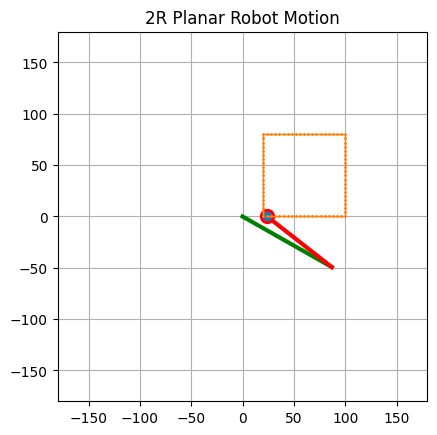

In [ ]:
# Aniimate Robototion for a square trajectory
import ipywidgets as widgets
from IPython.display import display, HTML
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from collections import deque

# 2R planar robot parameters (lengths of two links)
L1 = 100
L2 = 80

# Function for inverse kinematics
def inverse_kinematics(x, y):
    dist = math.sqrt(x**2 + y**2)
    # Positions out of reach
    if dist > L1 + L2 :
        return  math.degrees(math.atan2(y, x)), 0
    elif dist < abs(L1 - L2):
        return math.degrees(math.atan2(y, x)), 180

    theta2 = math.acos((x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2))
    theta1 = math.atan2(y, x) - math.atan2((L2 * math.sin(theta2)), (L1 + L2 * math.cos(theta2)))
    return math.degrees(theta1), math.degrees(theta2)

# Function to show robot's motion in configuration space
def update_robot_config(i):
  # angle = i * 2 * np.pi / num_points
  # x1 = np.linspace(20, 20, num_points)
  # y1 = np.linspace(0, 50, num_points)
  side = 50
  offset = 20
  quarter = int(num_points/4)
  samples = np.linspace(0,side, quarter+1)
  # print(int(num_points/4))
  x = offset
  y = samples[0]
  if i < quarter:
    x = offset
    y = samples[i]
  elif i >= quarter and i < 2*quarter:
    x = offset + samples[i-quarter]
    y = side
  elif i >= 2*quarter and i < 3*quarter:
    x = offset + side
    y = side - samples[i-2*quarter]
  else:
    x = offset + side - samples[i-3*quarter+1]
    y = 0

  joint_angles = inverse_kinematics(x, y)
  if joint_angles is not None:
      theta1, theta2 = joint_angles

      # # Draw the robot links
      x0, y0 = 0, 0
      x1 = L1 * np.cos(np.radians(theta1))
      y1 = L1 * np.sin(np.radians(theta1))
      x2 = x1 + L2 * np.cos(np.radians(theta1 + theta2))
      y2 = y1 + L2 * np.sin(np.radians(theta1 + theta2))

  if i == 0:
    history_x.clear()
    history_y.clear()

  history_x.appendleft(theta1)
  history_y.appendleft(theta2)
  # link1.set_data([x0, x1], [y0, y1])
  # link2.set_data([x1, x2], [y1, y2])
  line.set_data(theta1,theta2)
  trace.set_data(history_x, history_y)
  config.set_data(theta1, theta2)
  return line, config


# Function to update the robot's position
def update_robot_position(i):
    # angle = i * 2 * np.pi / num_points
    # x1 = np.linspace(20, 20, num_points)
    # y1 = np.linspace(0, 50, num_points)
    side = 80
    offset = 20
    quarter = int(num_points/4)
    samples = np.linspace(0,side, quarter+1)
    # print(int(num_points/4))
    x = offset
    y = samples[0]
    if i < quarter:
      x = offset
      y = samples[i]
    elif i >= quarter and i < 2*quarter:
      x = offset + samples[i-quarter]
      y = side
    elif i >= 2*quarter and i < 3*quarter:
      x = offset + side
      y = side - samples[i-2*quarter]
    else:
      x = offset + side - samples[i-3*quarter]
      y = 0

    joint_angles = inverse_kinematics(x, y)
    if joint_angles is not None:
        theta1, theta2 = joint_angles

        # Draw the robot links
        x0, y0 = 0, 0
        x1 = L1 * np.cos(np.radians(theta1))
        y1 = L1 * np.sin(np.radians(theta1))
        x2 = x1 + L2 * np.cos(np.radians(theta1 + theta2))
        y2 = y1 + L2 * np.sin(np.radians(theta1 + theta2))

    if i == 0:
      history_x.clear()
      history_y.clear()

    history_x.appendleft(x2)
    history_y.appendleft(y2)
    # link1.set_data([x0, x1], [y0, y1])
    # link2.set_data([x1, x2], [y1, y2])
    line.set_data(x2,y2)
    trace.set_data(history_x, history_y)

    link1.set_data([x0, x1], [y0, y1])
    link2.set_data([x1, x2], [y1, y2])
    end_effector.set_data(x2, y2)
    return line, link1, link2, end_effector

# Create figure and axes
fig1, ax = plt.subplots()

ax.set_title("2R Planar Robot Motion")
ax.set_xlim(-L1 - L2, L1 + L2)
ax.set_ylim(-L1 - L2, L1 + L2)
ax.set_aspect("equal")
ax.grid()

# Draw the robot links
link1, = ax.plot([], [], 'g', lw=3)
link2, = ax.plot([], [], 'r', lw=3)
end_effector, = ax.plot([], [], 'ro', markersize=10)
config, = ax.plot([], [], 'ro', markersize=10)
line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)

history_len = 80
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)

# Animate the robot's motion
num_points = 4*20 # Multiples of 4
ani = animation.FuncAnimation(fig1, update_robot_position, frames=num_points, interval=50, blit=True, save_count=50)

# Display the animation
HTML(ani.to_jshtml())


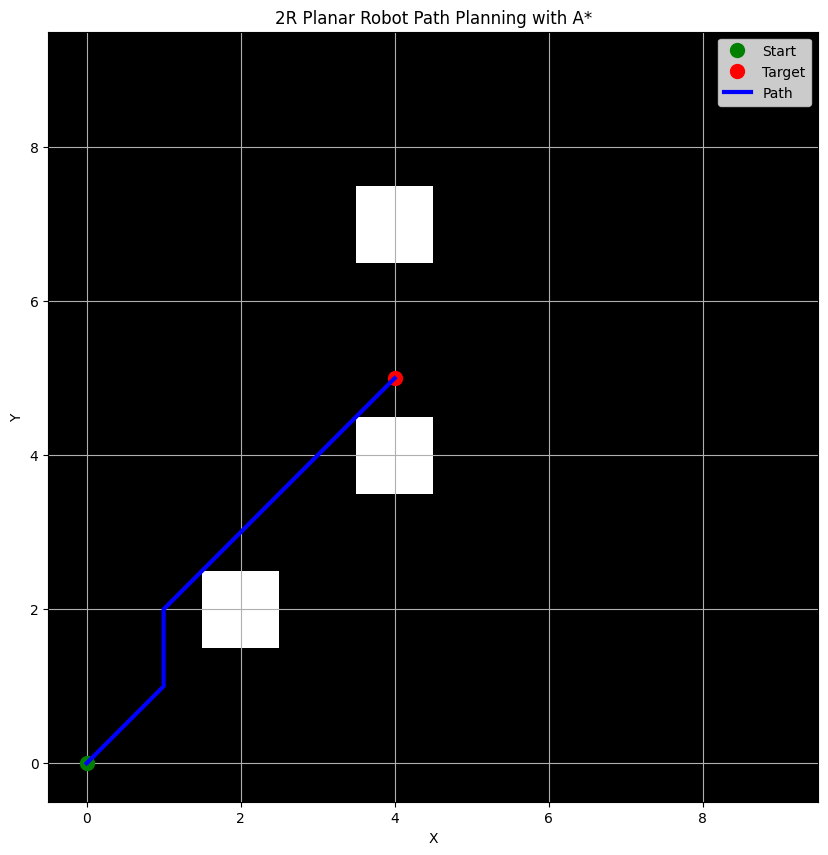

In [97]:
# Visualize  A* search algorithm
import math
import heapq
import numpy as np
import matplotlib.pyplot as plt

# Define the 2D grid and obstacles (0: empty, 1: obstacle)
GRID_WIDTH = 10
GRID_HEIGHT = 10
grid = [[0 for _ in range(GRID_WIDTH)] for _ in range(GRID_HEIGHT)]
grid[4][4] = 1
grid[7][4] = 1
grid[2][2] = 1

# Function for A* algorithm to find the shortest path
def heuristic(a, b):
    # Using euclidean distance as  heuristic function
    return math.sqrt(abs(b[0] - a[0])**2 + abs(b[1] - a[1])**2)

def a_star(start, target):
    open_set = []
    closed_set = set()
    heapq.heappush(open_set, (0, start))
    came_from = {}

    g_score = {pos: float('inf') for pos in [(i, j) for i in range(GRID_HEIGHT) for j in range(GRID_WIDTH)]}
    g_score[start] = 0

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == target:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        closed_set.add(current)

        for dy in [-1, 0, 1]:
            for dx in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue  # Skip the current cell (center)

                neighbor = (current[0] + dy, current[1] + dx)
                if 0 <= neighbor[0] < GRID_HEIGHT and 0 <= neighbor[1] < GRID_WIDTH and grid[neighbor[0]][neighbor[1]] == 0:
                    tentative_g_score = g_score[current] + (1 if dx == 0 or dy == 0 else math.sqrt(2))
                    if tentative_g_score < g_score[neighbor]:
                        came_from[neighbor] = current
                        g_score[neighbor] = tentative_g_score
                        f_score = tentative_g_score + heuristic(neighbor, target)
                        heapq.heappush(open_set, (f_score, neighbor))

    return None

# Set the starting and target positions
start_pos = (0, 0)
target_pos = (5, 4)

# Find the shortest path using A* algorithm
path = a_star(start_pos, target_pos)

# Visualization using matplotlib
plt.figure(figsize=(GRID_WIDTH, GRID_HEIGHT))
plt.imshow(np.array(grid), cmap='gray')

# Plot the start and target positions
plt.plot(start_pos[1], start_pos[0], 'go', markersize=10, label='Start')
plt.plot(target_pos[1], target_pos[0], 'ro', markersize=10, label='Target')

# Plot the path
if path is not None:
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, 'b-', linewidth=3, label='Path')

plt.legend()
plt.title('2R Planar Robot Path Planning with A*')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert Y-axis to match the grid representation
plt.show()


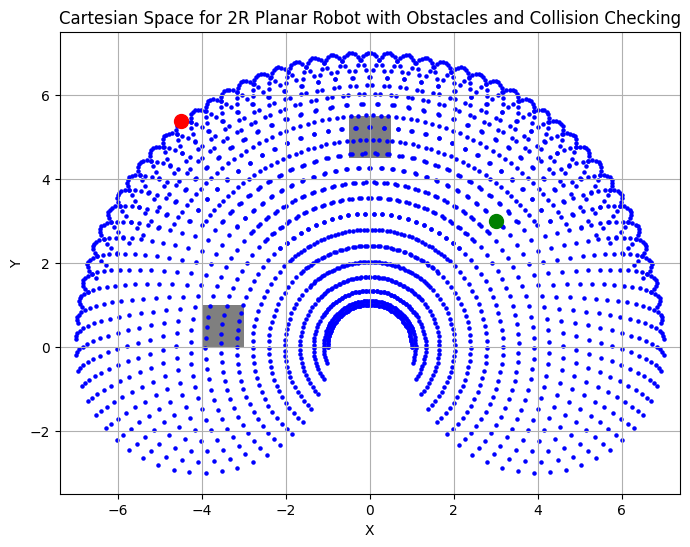

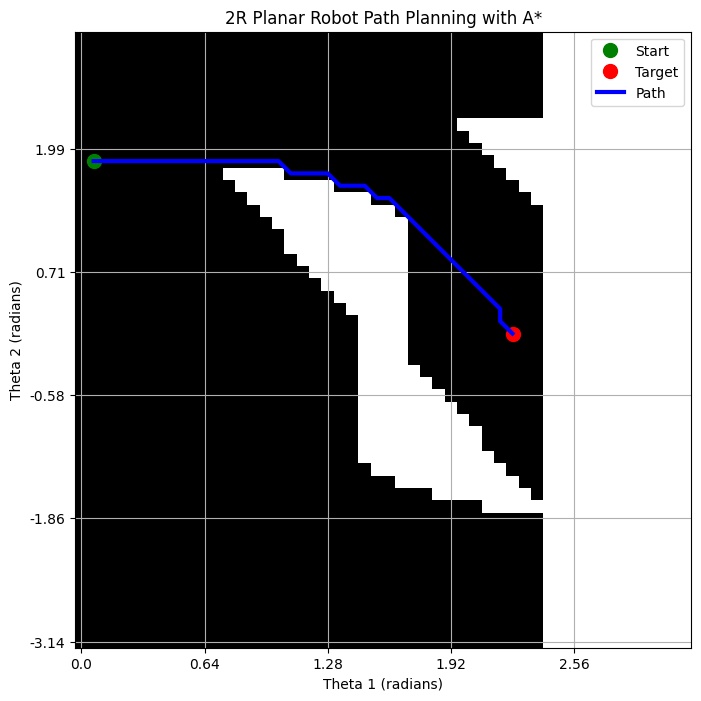

In [120]:
# Visualise 2R planar Robot's Workspace and Configuration space with obstacles
import math
import heapq
import matplotlib.pyplot as plt
import numpy as np

# Define the arm lengths of the 2R planar robot
L1 = 4  # Length of the first arm
L2 = 3  # Length of the second arm

# Function for forward kinematics to calculate the end effector position in Cartesian space
def forward_kinematics(theta1, theta2):
    x = L1 * math.cos(theta1) + L2 * math.cos(theta1 + theta2)
    y = L1 * math.sin(theta1) + L2 * math.sin(theta1 + theta2)
    return x, y

# Function for inverse kinematics
def inverse_kinematics(x, y):
    dist = math.sqrt(x**2 + y**2)
    # Positions out of reach
    if dist > L1 + L2 :
        return  math.atan2(y, x), 0
    elif dist < abs(L1 - L2):
        return math.atan2(y, x), math.pi

    theta2 = math.acos((x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2))
    theta1 = math.atan2(y, x) - math.atan2((L2 * math.sin(theta2)), (L1 + L2 * math.cos(theta2)))
    return theta1, theta2

# Function to check if a line segment intersects with a rectangle
def is_line_intersect_rect(x1, y1, x2, y2, rect):
    x_min, x_max, y_min, y_max = rect
    if (x1 <= x_min and x2 <= x_min) or (x1 >= x_max and x2 >= x_max) or (y1 <= y_min and y2 <= y_min) or (y1 >= y_max and y2 >= y_max):
        return False
    return True

# Function to check if a point (x, y) is inside an obstacle (rectangle)
def is_inside_obstacle(x, y, obstacle):
    x_min, x_max, y_min, y_max = obstacle
    return x_min <= x <= x_max and y_min <= y <= y_max

# Function for A* algorithm to find the shortest path
def heuristic(a, b):
    # Using euclidean distance as  heuristic function
    return math.sqrt(abs(b[0] - a[0])**2 + abs(b[1] - a[1])**2)

def a_star(start, target):
    open_set = []
    closed_set = set()
    heapq.heappush(open_set, (0, start))
    came_from = {}

    g_score = {pos: float('inf') for pos in [(i, j) for i in range(GRID_HEIGHT) for j in range(GRID_WIDTH)]}
    g_score[start] = 0

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == target:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        closed_set.add(current)

        for dy in [-1, 0, 1]:
            for dx in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue  # Skip the current cell (center)

                neighbor = (current[0] + dy, current[1] + dx)
                if 0 <= neighbor[0] < GRID_HEIGHT and 0 <= neighbor[1] < GRID_WIDTH and grid[neighbor[0]][neighbor[1]] == 0:
                    tentative_g_score = g_score[current] + (1 if dx == 0 or dy == 0 else math.sqrt(2))
                    if tentative_g_score < g_score[neighbor]:
                        came_from[neighbor] = current
                        g_score[neighbor] = tentative_g_score
                        f_score = tentative_g_score + heuristic(neighbor, target)
                        heapq.heappush(open_set, (f_score, neighbor))

    return None

# Define the range of joint angles (configuration space)
theta1_range = (0, math.pi)  # From 0 to pi radians
theta2_range = (-math.pi, math.pi)  # From 0 to pi radians
num_points = 50  # Number of points for each joint angle

# Generate points in configuration space and compute corresponding Cartesian points
theta1_values = [theta1_range[0] + i * (theta1_range[1] - theta1_range[0]) / (num_points - 1) for i in range(num_points)]
theta2_values = [theta2_range[0] + i * (theta2_range[1] - theta2_range[0]) / (num_points - 1) for i in range(num_points)]

GRID_WIDTH = len(theta1_values)
GRID_HEIGHT = len(theta2_values)
grid = [[0 for _ in range(GRID_WIDTH)] for _ in range(GRID_HEIGHT)]

cartesian_points = []
for theta1 in theta1_values:
    for theta2 in theta2_values:
        x, y = forward_kinematics(theta1, theta2)
        cartesian_points.append((x, y))

# Define obstacles as rectangles in Cartesian space (xmin, xmax, ymin, ymax)
obstacles = [(-4, -3, 0, 1), (-0.5, 0.5, 4.5, 5.5)]

# Plot Cartesian space with obstacles and robot arms
plt.figure(figsize=(8, 6))

# Set the starting and target positions
start_pos = (3, 3)
target_pos = (5.37, -4.48)

# Plot the start and target positions
plt.plot(start_pos[1], start_pos[0], 'go', markersize=10, label='Start')
plt.plot(target_pos[1], target_pos[0], 'ro', markersize=10, label='Target')

for obstacle in obstacles:
    x_min, x_max, y_min, y_max = obstacle
    plt.fill([x_min, x_max, x_max, x_min], [y_min, y_min, y_max, y_max], 'black', alpha=0.5)

plt.scatter([p[0] for p in cartesian_points], [p[1] for p in cartesian_points], s=5, color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cartesian Space for 2R Planar Robot with Obstacles and Collision Checking')
plt.grid(True)
plt.axis('equal')
plt.show()

# Set the starting and target cnfigurations
start_config = inverse_kinematics(start_pos[1],start_pos[0])
target_config = inverse_kinematics(target_pos[1],  target_pos[0])

start_config_approx= [0,0]
start_config_approx[0] = min( theta1_values, key = lambda x : abs(start_config[0] - x) )
start_config_approx[1] = min( theta2_values, key = lambda x : abs(start_config[1] - x) )

target_config_approx= [0,0]
target_config_approx[0] = min( theta1_values, key = lambda x : abs(target_config[0] - x) )
target_config_approx[1] = min( theta2_values, key = lambda x : abs(target_config[1] - x) )

for theta1 in theta1_values:
    for theta2 in theta2_values:
        x, y = forward_kinematics(theta1, theta2) # End position of the second arm
        x1, y1 = 0, 0  # Start position of the first arm
        x2, y2 = L1 * math.cos(theta1) , L1 * math.sin(theta1) # End position of the first arm
        for obstacle in obstacles:
            if is_inside_obstacle(x, y, obstacle) or is_line_intersect_rect(x1, y1, x2, y2, obstacle) or is_line_intersect_rect(x2, y2, x, y, obstacle):
                grid[theta2_values.index(theta2)][theta1_values.index(theta1)] = 1
                break

# Find the shortest path using A* algorithm
path = a_star( ( theta2_values.index(start_config_approx[1]), theta1_values.index(start_config_approx[0])), ( theta2_values.index(target_config_approx[1]), theta1_values.index(target_config_approx[0])) )

# Plot Configuration space with obstacles
plt.figure(figsize=(8,8))
plt.imshow(np.array(grid), cmap='gray')

# Plot the start and target positions
plt.plot(theta1_values.index(start_config_approx[0]), theta2_values.index(start_config_approx[1]), 'go', markersize=10, label='Start')
plt.plot(theta1_values.index(target_config_approx[0]), theta2_values.index(target_config_approx[1]), 'ro', markersize=10, label='Target')

# Plot the path
if path is not None:
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, 'b-', linewidth=3, label='Path')

plt.legend()
plt.title('2R Planar Robot Path Planning with A*')
plt.xlabel('Theta 1 (radians)')
plt.ylabel('Theta 2 (radians)')
plt.xticks( range(0, len(theta1_values), 10), [round(theta1, 2) for index, theta1 in enumerate(theta1_values) if index%10 ==0] )
plt.yticks( range(0, len(theta2_values), 10), [round(theta2, 2) for index, theta2 in enumerate(theta2_values) if index%10 ==0] )
plt.grid(True)
plt.gca().invert_yaxis()  # Invert Y-axis to match the grid representation


<ipython-input-126-c4411d922520>:95: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=60.
  ani = animation.FuncAnimation(fig1, update_robot_position, frames= sample_points, interval=50, blit=True, save_count=50)
<ipython-input-126-c4411d922520>:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x2,y2)
<ipython-input-126-c4411d922520>:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  end_effector.set_data(x2, y2)
<ipython-input-126-c4411d922520>:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x2,y2)
<ipython-input-126-c4411d922520>:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be rem

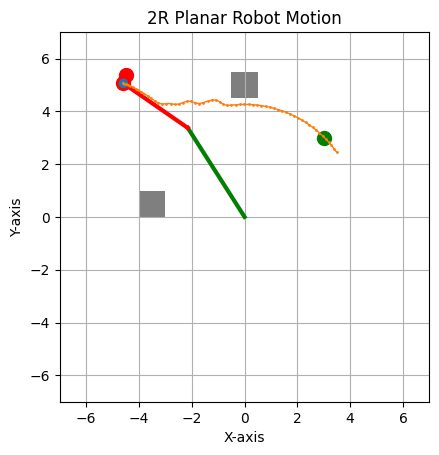

In [126]:
# Animate motion planning with obstacle avoidance for a 2R planar Robot
import ipywidgets as widgets
from IPython.display import display, HTML
import matplotlib.animation as animation
from collections import deque
from scipy.interpolate import CubicSpline
from scipy.interpolate import BSpline

# Function to update the robot's position
def update_robot_position(i):
    j = i * len(waypoints) / sample_points
    # joint_angles = theta1_values[j1], theta2_values[j2]
    joint_angles = bspline_x(j), bspline_y(j)

    if joint_angles is not None:
        theta1, theta2 = joint_angles

        # Draw the robot links
        x0, y0 = 0, 0
        x1 = L1 * np.cos(theta1)
        y1 = L1 * np.sin(theta1)
        x2 = x1 + L2 * np.cos(theta1 + theta2)
        y2 = y1 + L2 * np.sin(theta1 + theta2)

    if i == 0:
      history_x.clear()
      history_y.clear()

    history_x.appendleft(x2)
    history_y.appendleft(y2)
    line.set_data(x2,y2)
    trace.set_data(history_x, history_y)

    link1.set_data([x0, x1], [y0, y1])
    link2.set_data([x1, x2], [y1, y2])
    end_effector.set_data(x2, y2)
    return line, link1, link2, end_effector

# Create figure and axes
fig1, ax = plt.subplots()

# Plot the start and target positions
ax.plot(start_pos[1], start_pos[0], 'go', markersize=10, label='Start')
ax.plot(target_pos[1], target_pos[0], 'ro', markersize=10, label='Target')
for obstacle in obstacles:
    x_min, x_max, y_min, y_max = obstacle
    ax.fill([x_min, x_max, x_max, x_min], [y_min, y_min, y_max, y_max], 'black', alpha=0.5)

ax.set_title("2R Planar Robot Motion")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_xlim(-L1 - L2, L1 + L2)
ax.set_ylim(-L1 - L2, L1 + L2)
ax.set_aspect("equal")
ax.grid()

# Draw the robot links
link1, = ax.plot([], [], 'g', lw=3)
link2, = ax.plot([], [], 'r', lw=3)
end_effector, = ax.plot([], [], 'ro', markersize=10)
config, = ax.plot([], [], 'ro', markersize=10)
line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)

history_len = 100
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)

# Cubic interpolation
waypoints = list()
for i,waypoint in zip(range(0,len(path)),path):
  j1 = path[i][1]
  j2 = path[i][0]
  waypoints.append([theta1_values[j1], theta2_values[j2]])


waypoints_x = np.zeros(len(waypoints))
waypoints_y = np.zeros(len(waypoints))

for i, waypoint in zip(range(0,len(waypoints)), waypoints):
  waypoints_x[i] = waypoint[0]
  waypoints_y[i] = waypoint[1]

# Create Cubic-spline objects for x and y coordinates
# cs_x = CubicSpline(np.arange(len(waypoints)), waypoints_x)
# cs_y = CubicSpline(np.arange(len(waypoints)), waypoints_y)

# Create B-spline objects for x and y coordinates
degree = 5
t = np.arange(len(waypoints)+ degree + 1)
bspline_x = BSpline(t, waypoints_x, degree)
bspline_y = BSpline(t, waypoints_y, degree)

sample_points = 60  # Number of points for interpolation

ani = animation.FuncAnimation(fig1, update_robot_position, frames= sample_points, interval=50, blit=True, save_count=50)

# Display the animation
HTML(ani.to_jshtml())


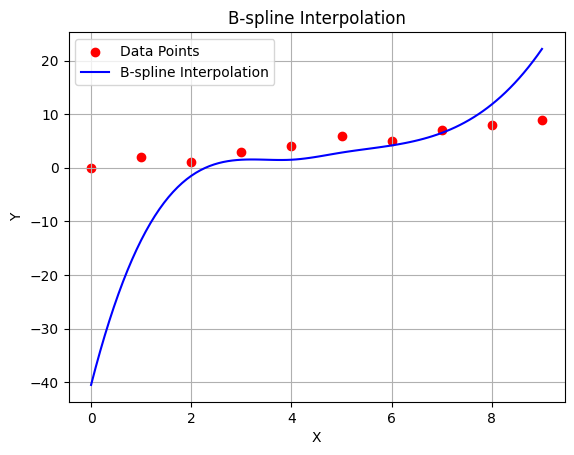

In [99]:
# Example plot visualization for bspline interpolation
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Define the data points
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([0, 2, 1, 3, 4, 6, 5, 7, 8, 9])

# Define the degree of the B-spline
degree = 3

# Create a B-spline object
bspline = BSpline(x, y, degree)

# Evaluate the B-spline at new points
new_x = np.linspace(0, 9, 100)
new_y = bspline(new_x)

# Plot the original data points and the B-spline interpolation
plt.scatter(x, y, label='Data Points', color='red')
plt.plot(new_x, new_y, label='B-spline Interpolation', color='blue')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('B-spline Interpolation')
plt.grid(True)
plt.show()
